### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import zipfile

In [2]:
dataset_path = "database.sqlite.zip"
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")
zip_object.extractall("./")
zip_object.close() 

### Connection to DB

In [4]:
conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql_query("""
SELECT *
FROM sqlite_master
WHERE type = 'table';
""",conn)

###  Tables in DB

In [6]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### List of countires

In [7]:
countries = pd.read_sql("""Select * 
                        FROM Country;""",conn)

countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### list of leagues and their countires

In [8]:
pd.read_sql("""Select * 
            FROM League;""",conn)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [9]:
leagues = pd.read_sql("""Select * 
                        FROM League as l
                        INNER JOIN Country as c
                        ON l.country_id = c.id;""",conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### List of Teams

In [10]:
pd.read_sql("""Select * 
            FROM Team
            LIMIT 10;""",conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [11]:
teams = pd.read_sql("""Select * 
            FROM Team
            ORDER BY team_long_name
            LIMIT 10;""",conn)

teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### list of matches

In [12]:
pd.read_sql("""SELECT * 
            FROM MATCH
            LIMIT 25;""",conn)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [15]:
detailed_matches = pd.read_sql("""Select m.id,
                                    c.name AS Country_Name,
                                    l.Name AS League_Name,
                                    season,
                                    stage,
                                    date,
                                    HT.team_long_name as Home_Team,
                                    AT.team_long_name AS Away_Team,
                                    home_team_goal,
                                    away_team_goal
                                FROM Match m
                                INNER JOIN Country c 
                                ON m.country_id = c.id
                                INNER JOIN League l
                                ON l.id = m.league_id
                                LEFT JOIN Team as HT
                                ON HT.team_api_id = m.home_team_api_id
                                LEFT JOIN Team as AT
                                ON AT.team_api_id = m.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER BY date
                                LIMIT 10;""",conn) 

detailed_matches

,id,Country_Name,League_Name,season,stage,date,Home_Team,Away_Team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


#### Basic Analysis

In [17]:
leagues_by_season = pd.read_sql("""Select c.name as country_name,
                                    l.name as league_name,
                                    season,
                                    COUNT(Distinct stage) AS num_of_stages,
                                    COUNT(Distinct HT.team_long_name) AS num_of_teams,
                                    AVG(home_team_goal) AS Avg_home_team_scores,
                                    AVG(away_team_goal) AS Avg_away_team_scores,
                                    AVG(home_team_goal - away_team_goal) AS Avg_Goal_Diff,
                                    AVG(home_team_goal + away_team_goal) AS Avg_Goals,
                                    SUM(home_team_goal+away_team_goal) AS Total_Goals
                                FROM Match m
                                INNER JOIN Country c 
                                ON m.country_id = c.id
                                INNER JOIN League l
                                ON l.id = m.league_id
                                LEFT JOIN Team as HT
                                ON HT.team_api_id = m.home_team_api_id
                                LEFT JOIN Team as AT
                                ON AT.team_api_id = m.away_team_api_id
                                WHERE country_name in ('Spain','Germany','France','Italy','England')
                                GROUP BY c.name,l.name,season
                                ORDER BY date""",conn)

leagues_by_season

,country_name,league_name,season,num_of_stages,num_of_teams,Avg_home_team_scores,Avg_away_team_scores,Avg_Goal_Diff,Avg_Goals,Total_Goals
0,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
1,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
2,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
3,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101
4,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
5,Germany,Germany 1. Bundesliga,2009/2010,34,18,1.513072,1.316993,0.196078,2.830065,866
6,France,France Ligue 1,2009/2010,38,20,1.389474,1.021053,0.368421,2.410526,916
7,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
8,Italy,Italy Serie A,2009/2010,38,20,1.542105,1.068421,0.473684,2.610526,992
9,Spain,Spain LIGA BBVA,2009/2010,38,20,1.600000,1.113158,0.486842,2.713158,1031


In [18]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()),columns = leagues_by_season['country_name'].unique())
df

,France,Germany,England,Spain,Italy
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [23]:
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany','Avg_Goals'])
df.loc[:,'Germany']

2008/2009    2.921569
2009/2010    2.830065
2010/2011    2.921569
2011/2012    2.859477
2012/2013    2.934641
2013/2014    3.160131
2014/2015    2.754902
2015/2016    2.830065
Name: Germany, dtype: float64

In [24]:
df

,France,Germany,England,Spain,Italy
2008/2009,NaN,2.921569,NaN,NaN,NaN
2009/2010,NaN,2.830065,NaN,NaN,NaN
2010/2011,NaN,2.921569,NaN,NaN,NaN
2011/2012,NaN,2.859477,NaN,NaN,NaN
2012/2013,NaN,2.934641,NaN,NaN,NaN
2013/2014,NaN,3.160131,NaN,NaN,NaN
2014/2015,NaN,2.754902,NaN,NaN,NaN
2015/2016,NaN,2.830065,NaN,NaN,NaN


In [25]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()),columns = leagues_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany','Avg_Goals'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain','Avg_Goals'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France','Avg_Goals'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy','Avg_Goals'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England','Avg_Goals'])
df

,France,Germany,England,Spain,Italy
2008/2009,2.257895,2.921569,2.478947,2.897368,2.600000
2009/2010,2.410526,2.830065,2.771053,2.713158,2.610526
2010/2011,2.342105,2.921569,2.797368,2.742105,2.513158
2011/2012,2.515789,2.859477,2.805263,2.763158,2.583799
2012/2013,2.544737,2.934641,2.797368,2.871053,2.639474
2013/2014,2.455263,3.160131,2.768421,2.750000,2.723684
2014/2015,2.492105,2.754902,2.565789,2.655263,2.686016
2015/2016,2.526316,2.830065,2.700000,2.744737,2.576316


<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

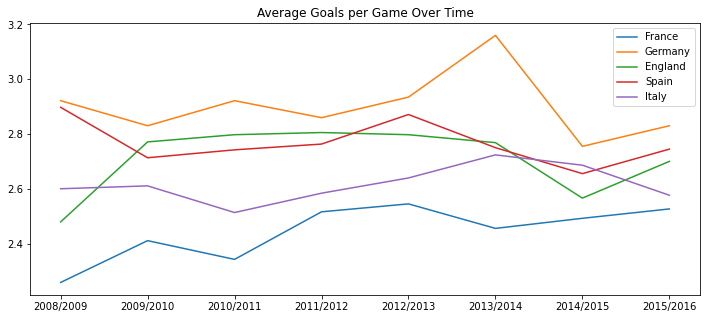

In [26]:
df.plot(figsize = (12,5),title = 'Average Goals per Game Over Time')

In [27]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()),columns = leagues_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany','Avg_Goal_Diff'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain','Avg_Goal_Diff'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France','Avg_Goal_Diff'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy','Avg_Goal_Diff'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England','Avg_Goal_Diff'])
df

,France,Germany,England,Spain,Italy
2008/2009,0.315789,0.477124,0.321053,0.423684,0.442105
2009/2010,0.368421,0.196078,0.623684,0.486842,0.473684
2010/2011,0.342105,0.372549,0.450000,0.531579,0.350000
2011/2012,0.431579,0.460784,0.373684,0.594737,0.438547
2012/2013,0.392105,0.248366,0.318421,0.502632,0.350000
2013/2014,0.376316,0.336601,0.378947,0.513158,0.350000
2014/2015,0.328947,0.421569,0.381579,0.418421,0.311346
2015/2016,0.347368,0.300654,0.284211,0.492105,0.365789


<AxesSubplot:title={'center':'Average Goals Diff Home Vs Away'}>

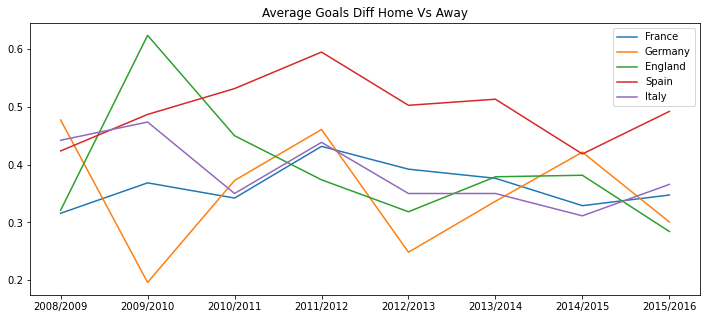

In [29]:
df.plot(figsize = (12,5),title = 'Average Goals Diff Home Vs Away')

In [30]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()),columns = leagues_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany','Total_Goals'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain','Total_Goals'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France','Total_Goals'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy','Total_Goals'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England','Total_Goals'])
df

,France,Germany,England,Spain,Italy
2008/2009,858,894,942,1101,988
2009/2010,916,866,1053,1031,992
2010/2011,890,894,1063,1042,955
2011/2012,956,875,1066,1050,925
2012/2013,967,898,1063,1091,1003
2013/2014,933,967,1052,1045,1035
2014/2015,947,843,975,1009,1018
2015/2016,960,866,1026,1043,979


<AxesSubplot:title={'center':'Total Goals'}>

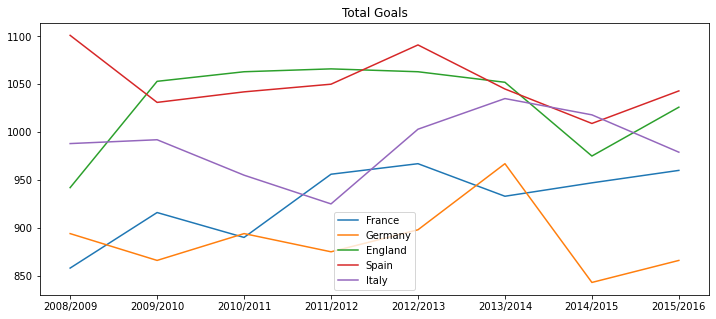

In [31]:
df.plot(figsize = (12,5),title = 'Total Goals')

In [32]:
### plotting heights
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)

players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<AxesSubplot:title={'center':'Potential vs Height'}, xlabel='calc_height'>

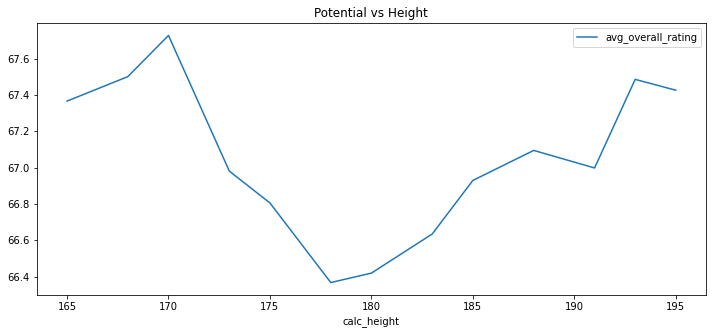

In [35]:
players_height.plot('calc_height','avg_overall_rating',figsize=(12,5),title='Potential vs Height')